<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/sprinkler_pgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directed graphical models

We illustrate some basic properties of DGMs.

In [1]:
try:
    from causalgraphicalmodels import CausalGraphicalModel
except ModuleNotFoundError:
    %pip install -qq causalgraphicalmodels
    from causalgraphicalmodels import CausalGraphicalModel
try:
    import pgmpy
except ModuleNotFoundError:
    %pip install -qq pgmpy
    import pgmpy
import numpy as np
import pandas as pd

# Make the model

In [2]:
sprinkler = CausalGraphicalModel(
    nodes=["cloudy", "rain", "sprinkler", "wet", "slippery"],
    edges=[("cloudy", "rain"), ("cloudy", "sprinkler"), ("rain", "wet"), ("sprinkler", "wet"), ("wet", "slippery")],
)

# Draw the model

In [3]:
# draw return a graphviz `dot` object, which jupyter can render
out = sprinkler.draw()

In [4]:
type(out)

graphviz.graphs.Digraph

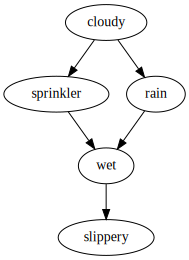

In [5]:
display(out)

In [6]:
out.render()

'Digraph.gv.pdf'

# Display the factorization

In [7]:
print(sprinkler.get_distribution())

P(cloudy)P(rain|cloudy)P(sprinkler|cloudy)P(wet|rain,sprinkler)P(slippery|wet)


# D-separation

In [8]:
# check for d-seperation of two nodes
sprinkler.is_d_separated("slippery", "cloudy", {"wet"})

True

# Extract CI relationships

In [9]:
# get all the conditional independence relationships implied by a CGM
CI = sprinkler.get_all_independence_relationships()
print(CI)

[('wet', 'cloudy', {'sprinkler', 'rain'}), ('wet', 'cloudy', {'slippery', 'sprinkler', 'rain'}), ('slippery', 'sprinkler', {'wet'}), ('slippery', 'sprinkler', {'wet', 'cloudy'}), ('slippery', 'sprinkler', {'wet', 'rain'}), ('slippery', 'sprinkler', {'wet', 'cloudy', 'rain'}), ('slippery', 'rain', {'wet'}), ('slippery', 'rain', {'wet', 'cloudy'}), ('slippery', 'rain', {'wet', 'sprinkler'}), ('slippery', 'rain', {'wet', 'cloudy', 'sprinkler'}), ('slippery', 'cloudy', {'wet'}), ('slippery', 'cloudy', {'wet', 'sprinkler'}), ('slippery', 'cloudy', {'wet', 'rain'}), ('slippery', 'cloudy', {'sprinkler', 'rain'}), ('slippery', 'cloudy', {'wet', 'sprinkler', 'rain'}), ('sprinkler', 'rain', {'cloudy'})]


In [10]:
records = []
for ci in CI:
    record = (ci[0], ci[1], ", ".join(x for x in ci[2]))
    records.append(record)

print(records)
df = pd.DataFrame(records, columns=("X", "Y", "Z"))
display(df)

[('wet', 'cloudy', 'sprinkler, rain'), ('wet', 'cloudy', 'slippery, sprinkler, rain'), ('slippery', 'sprinkler', 'wet'), ('slippery', 'sprinkler', 'wet, cloudy'), ('slippery', 'sprinkler', 'wet, rain'), ('slippery', 'sprinkler', 'wet, cloudy, rain'), ('slippery', 'rain', 'wet'), ('slippery', 'rain', 'wet, cloudy'), ('slippery', 'rain', 'wet, sprinkler'), ('slippery', 'rain', 'wet, cloudy, sprinkler'), ('slippery', 'cloudy', 'wet'), ('slippery', 'cloudy', 'wet, sprinkler'), ('slippery', 'cloudy', 'wet, rain'), ('slippery', 'cloudy', 'sprinkler, rain'), ('slippery', 'cloudy', 'wet, sprinkler, rain'), ('sprinkler', 'rain', 'cloudy')]


,X,Y,Z
0,wet,cloudy,"sprinkler, rain"
1,wet,cloudy,"slippery, sprinkler, rain"
2,slippery,sprinkler,wet
3,slippery,sprinkler,"wet, cloudy"
4,slippery,sprinkler,"wet, rain"
5,slippery,sprinkler,"wet, cloudy, rain"
6,slippery,rain,wet
7,slippery,rain,"wet, cloudy"
8,slippery,rain,"wet, sprinkler"
9,slippery,rain,"wet, cloudy, sprinkler"


In [11]:
print(df.to_latex(index=False))

\begin{tabular}{lll}
\toprule
        X &         Y &                         Z \\
\midrule
      wet &    cloudy &           sprinkler, rain \\
      wet &    cloudy & slippery, sprinkler, rain \\
 slippery & sprinkler &                       wet \\
 slippery & sprinkler &               wet, cloudy \\
 slippery & sprinkler &                 wet, rain \\
 slippery & sprinkler &         wet, cloudy, rain \\
 slippery &      rain &                       wet \\
 slippery &      rain &               wet, cloudy \\
 slippery &      rain &            wet, sprinkler \\
 slippery &      rain &    wet, cloudy, sprinkler \\
 slippery &    cloudy &                       wet \\
 slippery &    cloudy &            wet, sprinkler \\
 slippery &    cloudy &                 wet, rain \\
 slippery &    cloudy &           sprinkler, rain \\
 slippery &    cloudy &      wet, sprinkler, rain \\
sprinkler &      rain &                    cloudy \\
\bottomrule
\end{tabular}



# Parameterize the model

In [12]:
try:
    from pgmpy.models import BayesianModel
except ModuleNotFoundError:
    %pip install -qq pgmpy
    from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([("C", "S"), ("C", "R"), ("S", "W"), ("R", "W"), ("W", "L")])

# Defining individual CPDs.
cpd_c = TabularCPD(variable="C", variable_card=2, values=np.reshape([0.5, 0.5], (2, 1)))

# In pgmpy the columns are the evidences and rows are the states of the variable.

cpd_s = TabularCPD(variable="S", variable_card=2, values=[[0.5, 0.9], [0.5, 0.1]], evidence=["C"], evidence_card=[2])

cpd_r = TabularCPD(variable="R", variable_card=2, values=[[0.8, 0.2], [0.2, 0.8]], evidence=["C"], evidence_card=[2])

cpd_w = TabularCPD(
    variable="W",
    variable_card=2,
    values=[[1.0, 0.1, 0.1, 0.01], [0.0, 0.9, 0.9, 0.99]],
    evidence=["S", "R"],
    evidence_card=[2, 2],
)

cpd_l = TabularCPD(variable="L", variable_card=2, values=[[0.9, 0.1], [0.1, 0.9]], evidence=["W"], evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w, cpd_l)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

/root/miniconda3/envs/py37/lib/python3.7/site-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


True

# Inference

In [13]:
try:
    from pgmpy.inference import VariableElimination
except ModuleNotFoundError:
    %pip install -qq pgmpy
    from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# p(R=1)= 0.5*0.2 + 0.5*0.8 = 0.5
probs = infer.query(["R"]).values
print("\np(R=1) = ", probs[1])

# P(R=1|W=1) = 0.7079
probs = infer.query(["R"], evidence={"W": 1}).values
print("\np(R=1|W=1) = ", probs[1])


# P(R=1|W=1,S=1) = 0.3204
probs = infer.query(["R"], evidence={"W": 1, "S": 1}).values
print("\np(R=1|W=1,S=1) = ", probs[1])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


p(R=1) =  0.5


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


p(R=1|W=1) =  0.7079276773296245


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


p(R=1|W=1,S=1) =  0.32038834951456313
